In [1]:
%%capture output
%run spectrogram_gne_functions.ipynb

/home/pycbc/pycbc-software/lib/python2.7/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


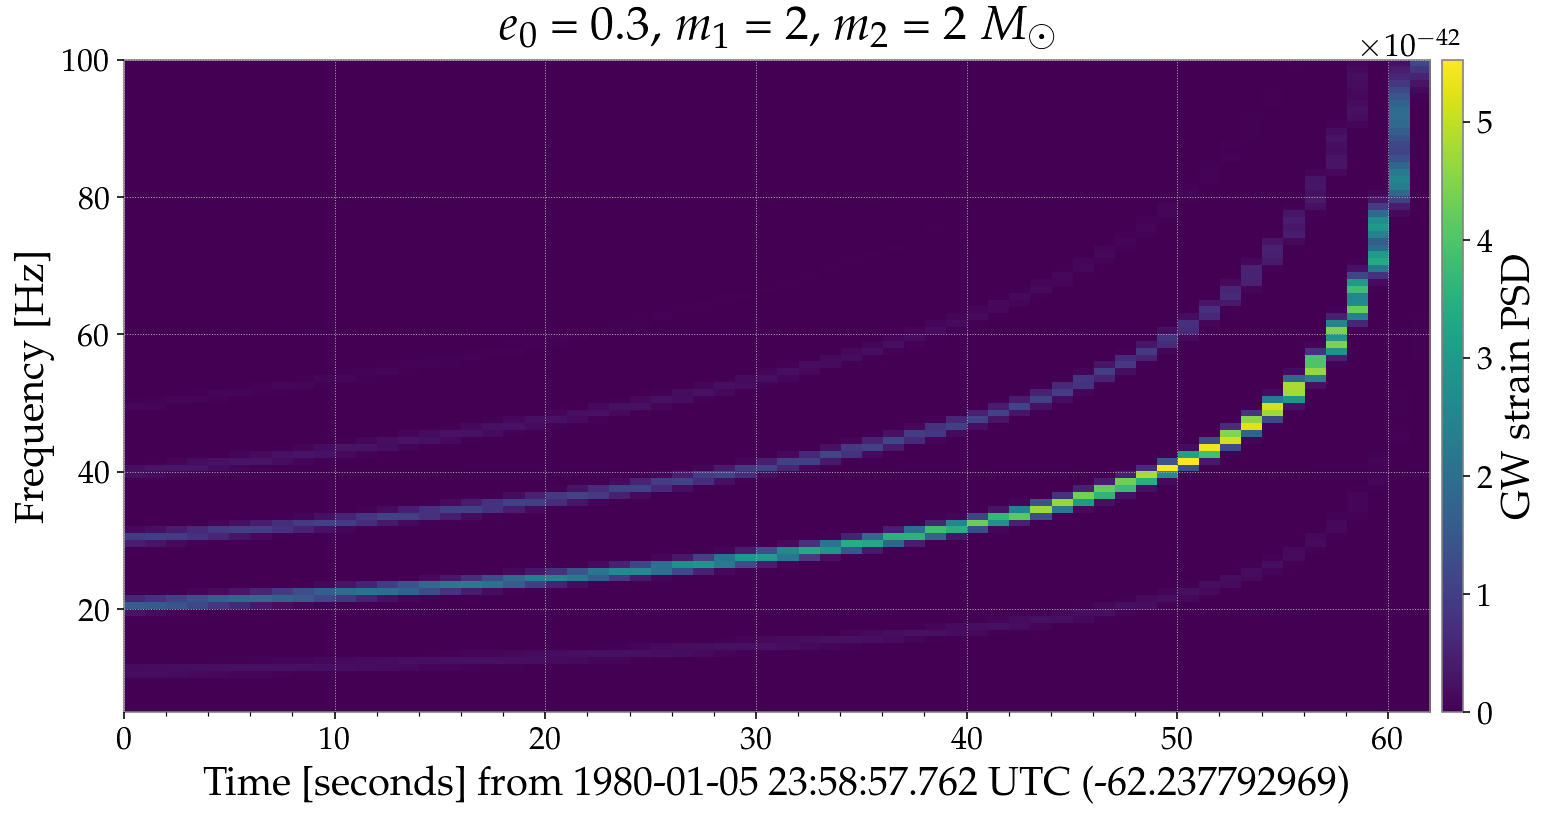

In [4]:
# Testing new spectogram algorithm
spec = genSpectrogram(0.3, 2, 2, 1)
plotSpectrogram(spec, 0.3, 2, 2)

In [2]:
# First, curve fitting for eccentricities spaced logarithmically 

# Define our parameters
e0_inj_log = np.logspace(-3,-0.1)  # 10^-3 to 10^-0.1(=~0.79) logarithmically spaced
m1=2
m2=2
fftlen=1
nMax=15
returnAll = False 

In [3]:
e_log_fit_lin = []
e_log_fit_log = []

for e0 in e0_inj_log: 
    e_lin = bestFitEcc(e0, m1, m2, fftlen, nMax, returnAll)
    e_log_fit_lin.append(e_lin)
    e_log = bestFitEccLog(e0, m1, m2, fftlen, nMax, returnAll)
    e_log_fit_log.append(e_log)

NameError: name 'bestFitEcc' is not defined

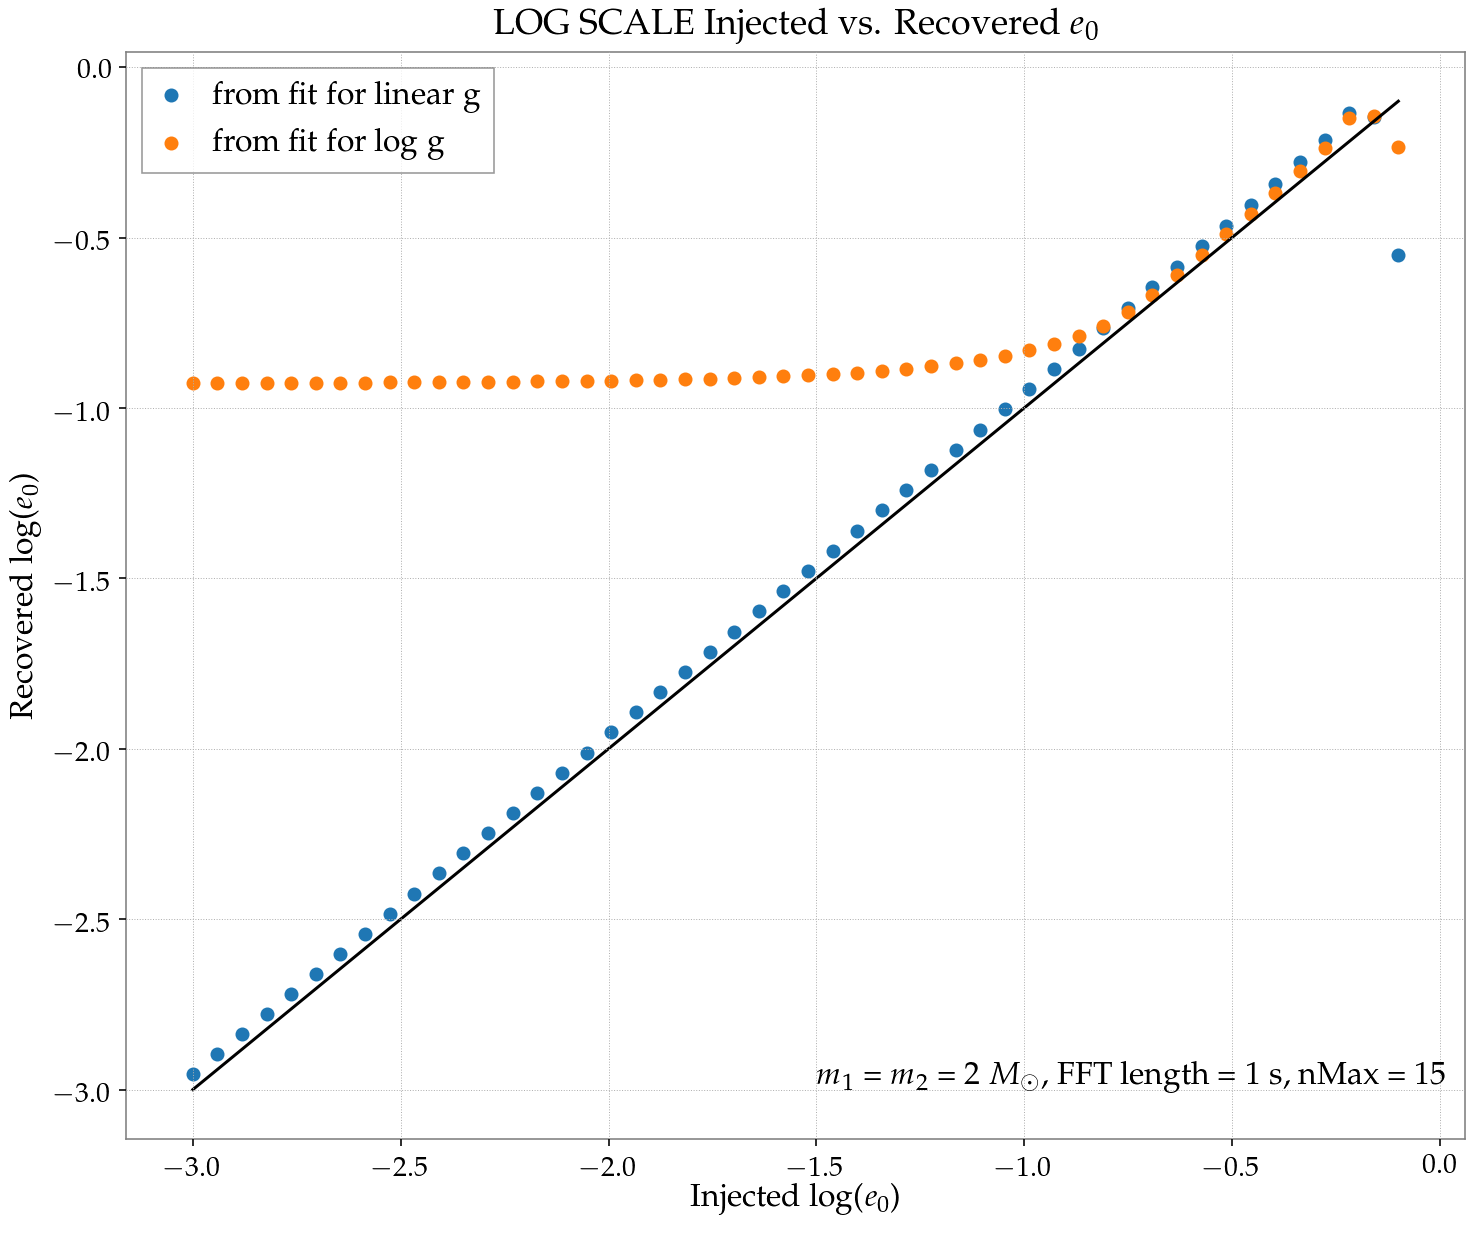

In [11]:
plt.figure(figsize=(12,10))
plt.plot(np.log10(e0_inj_log), np.log10(e0_inj_log), color='k')
plt.scatter(np.log10(e0_inj_log), np.log10(e_log_fit_lin), label='from fit for linear g')
plt.scatter(np.log10(e0_inj_log), np.log10(e_log_fit_log), label='from fit for log g')
plt.title(r"LOG SCALE Injected vs. Recovered $e_0$", fontsize=18)
plt.text(-1.5, -3, r"$m_1$ = $m_2$ = {} $M_\odot$, FFT length = {} s, nMax = {}".format(m1,fftlen,nMax),fontsize=16)
plt.xlabel(r"Injected log($e_0$)", fontsize=16)
plt.ylabel(r"Recovered log($e_0$)", fontsize=16)
plt.legend(fontsize=16)

Injected e0 = 0.3
Recovered e0 = 0.336006779944


(0, 15)

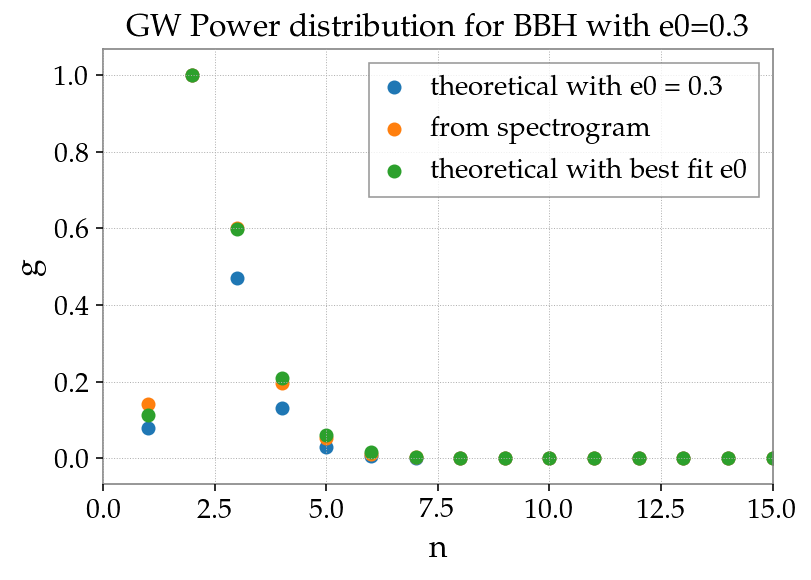

In [56]:
e0, e_fit, g_spec, g_theoretical, g_fit, n = bestFitEcc(e0, m, m, fftlen, nMax, True)

plt.scatter(n, g_theoretical, label='theoretical with e0 = 0.3')
plt.scatter(n, g_spec, label = 'from spectrogram')
plt.scatter(n, g_fit, label = 'theoretical with best fit e0')
plt.title("GW Power distribution for BBH with e0=0.3", fontsize=16)
plt.xlabel("n", fontsize=16)
plt.ylabel("g", fontsize=16)
plt.legend(fontsize=14)
plt.xlim(0,15)

In [4]:
# Trying fitting again after some edits to the functions

e_log_fit = []

for e0 in e0_inj_log: 
    e = bestFitEccMaggiore(e0, m1, m2, fftlen, nMax, returnAll)
    e_log_fit.append(e)

Injected e0 = 0.001
Recovered e0 = 0.00110600051963
Injected e0 = 0.00114599750858
Recovered e0 = 0.00126611834112
Injected e0 = 0.00131331028968
Recovered e0 = 0.00144978271558
Injected e0 = 0.00150505031997
Recovered e0 = 0.00166041015123
Injected e0 = 0.00172478391698
Recovered e0 = 0.00190191855429
Injected e0 = 0.0019765980717
Recovered e0 = 0.0021788001486
Injected e0 = 0.00226517646564
Recovered e0 = 0.00249620506271
Injected e0 = 0.00259588658613
Recovered e0 = 0.00286003716551
Injected e0 = 0.00297487956027
Recovered e0 = 0.00327706390085
Injected e0 = 0.0034092045644
Recovered e0 = 0.00375504221009
Injected e0 = 0.00390693993705
Recovered e0 = 0.00430286286706
Injected e0 = 0.00447734343405
Recovered e0 = 0.00493071592553
Injected e0 = 0.00513102442049
Recovered e0 = 0.00565028037538
Injected e0 = 0.00588014120237
Recovered e0 = 0.00647494155656
Injected e0 = 0.00673862716803
Recovered e0 = 0.0074200403876
Injected e0 = 0.00772244994584
Recovered e0 = 0.00850315911997
Injecte

/home/pycbc/pycbc-software/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


Injected e0 = 0.401866341011
Recovered e0 = 0.455264038632
Injected e0 = 0.460537825582
Recovered e0 = 0.52618137783
Injected e0 = 0.527775200726
Recovered e0 = 0.611528563136
Injected e0 = 0.604829065124
Recovered e0 = 0.734288443513
Injected e0 = 0.693132601751
Recovered e0 = 0.721654477502
Injected e0 = 0.794328234724
Recovered e0 = 0.276391951254


Text(0,0.5,u'Recovered log($e_0$)')

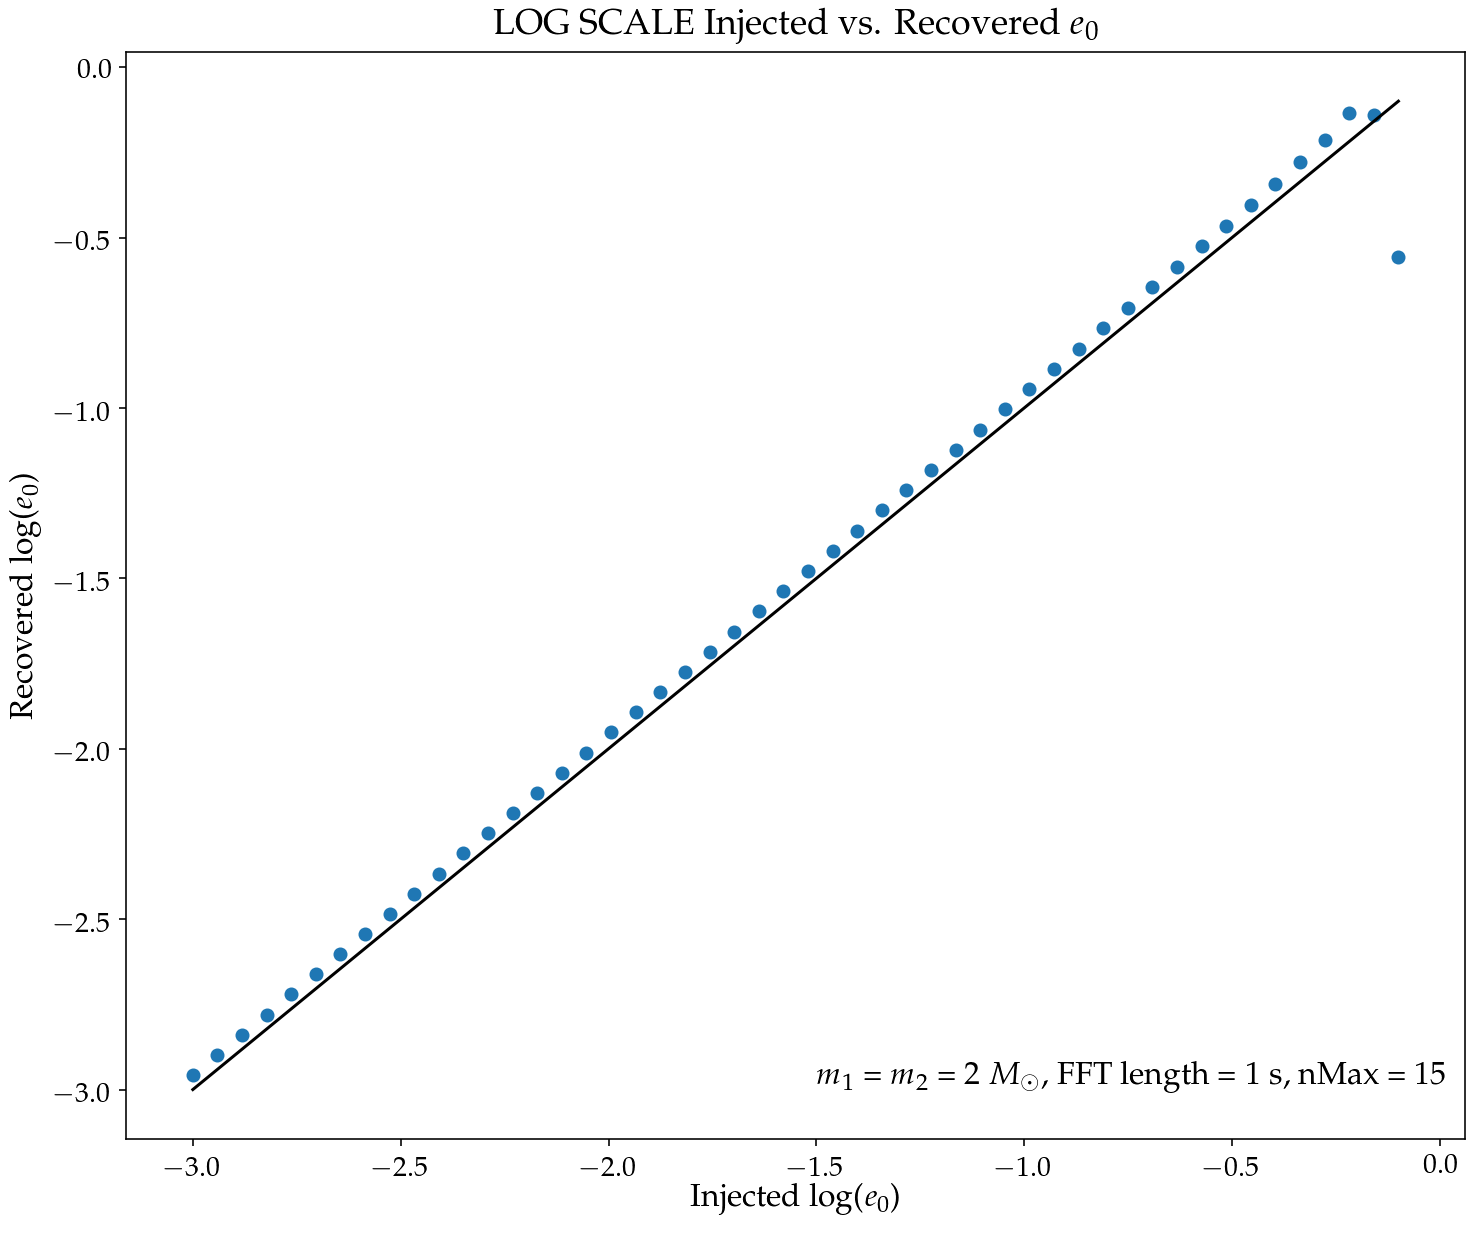

In [5]:
plt.figure(figsize=(12,10))
plt.plot(np.log10(e0_inj_log), np.log10(e0_inj_log), color='k')
plt.scatter(np.log10(e0_inj_log), np.log10(e_log_fit))
plt.title(r"LOG SCALE Injected vs. Recovered $e_0$", fontsize=18)
plt.text(-1.5, -3, r"$m_1$ = $m_2$ = {} $M_\odot$, FFT length = {} s, nMax = {}".format(m1,fftlen,nMax),fontsize=16)
plt.xlabel(r"Injected log($e_0$)", fontsize=16)
plt.ylabel(r"Recovered log($e_0$)", fontsize=16)